In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/diabetes_dataset.csv")

In [30]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Eksik veri belirleme

In [31]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 0 olan değerleri NaN ile değiştir
df[selected_columns] = df[selected_columns].replace(0, pd.NA)

# Eksik (NaN) veri sayısını bul
missing_counts = df.isna().sum()

# İlgili sütunları filtreleme
missing_counts[selected_columns]


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


Eksik değerleri doldurma. Hepsi sayısal veriler olduğu için mean ile doldurdum.SkinThickness'ın önemsiz olduğunu ve çok eksik olduğunu düşündüğüm için sildim

In [32]:
df[selected_columns] = df[selected_columns].fillna(df[selected_columns].mean())
df.drop(columns=['SkinThickness'], inplace=True)


<ipython-input-32-d0bb73a64887>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[selected_columns] = df[selected_columns].fillna(df[selected_columns].mean())


Tekrar eksik değerleri kontrol ettim

In [33]:
selected_columns = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']
# Eksik (NaN) veri sayısını bul
missing_counts = df.isna().sum()

# İlgili sütunları filtreleme
missing_counts[selected_columns]


,0
Glucose,0
BloodPressure,0
Insulin,0
BMI,0


Yeni Özellikler Türetme

In [34]:
def age_category(age):
    if age < 25:
        return "Genç"
    elif age < 50:
        return "Orta Yaşlı"
    else:
        return "Yaşlı"

df["Age_Category"] = df["Age"].apply(age_category)

df["Pregnancy_Age_Ratio"] = df["Pregnancies"] / df["Age"]

df["Health_Risk_Score"] = df["BMI"] * df["Glucose"] / 100



In [35]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,Pregnancy_Age_Ratio,Health_Risk_Score
0,6,148.0,72.0,155.548223,33.6,0.627,50,1,Yaşlı,0.120000,49.728
1,1,85.0,66.0,155.548223,26.6,0.351,31,0,Orta Yaşlı,0.032258,22.610
2,8,183.0,64.0,155.548223,23.3,0.672,32,1,Orta Yaşlı,0.250000,42.639
3,1,89.0,66.0,94.000000,28.1,0.167,21,0,Genç,0.047619,25.009
4,0,137.0,40.0,168.000000,43.1,2.288,33,1,Orta Yaşlı,0.000000,59.047


Standartlaştırma yapmadan önce aykırı değerlere bakalım, aykırı değerleri sınıra çekelim.


--- Pregnancies Sütunu ---


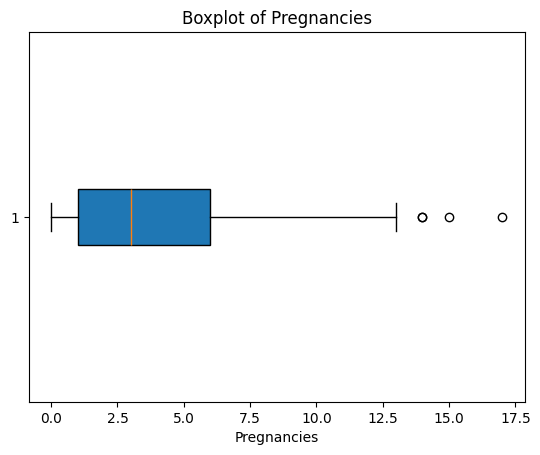

IQR: 5.0, Lower Bound: -6.5, Upper Bound: 13.5
Aykırı Değer Sayısı: 4


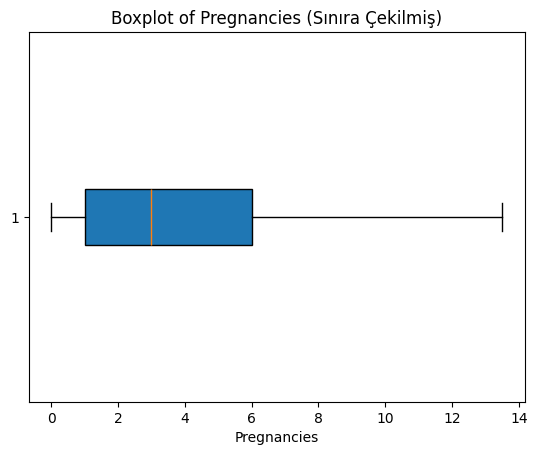


--- Glucose Sütunu ---


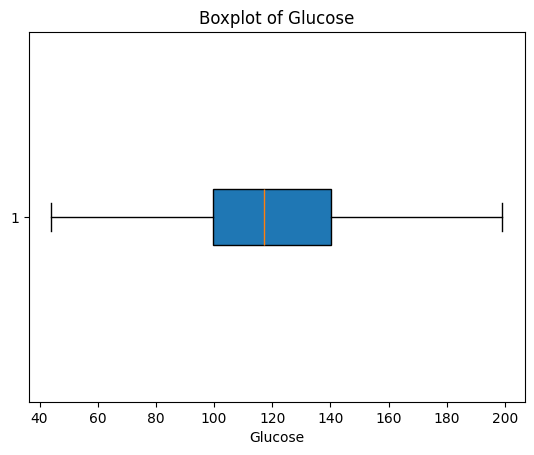

IQR: 40.5, Lower Bound: 39.0, Upper Bound: 201.0
Aykırı Değer Sayısı: 0


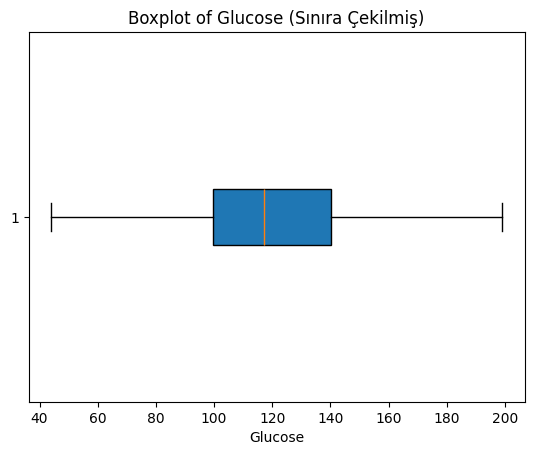


--- BloodPressure Sütunu ---


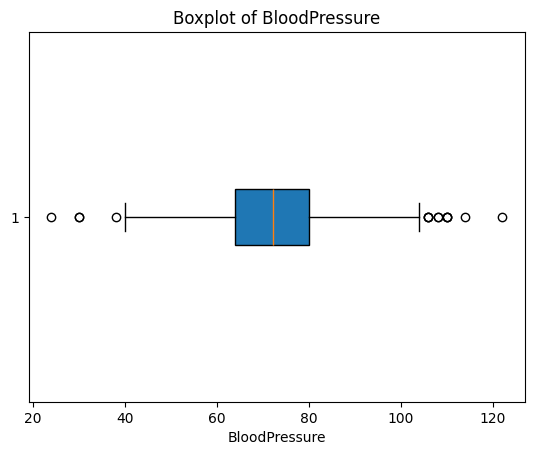

IQR: 16.0, Lower Bound: 40.0, Upper Bound: 104.0
Aykırı Değer Sayısı: 14


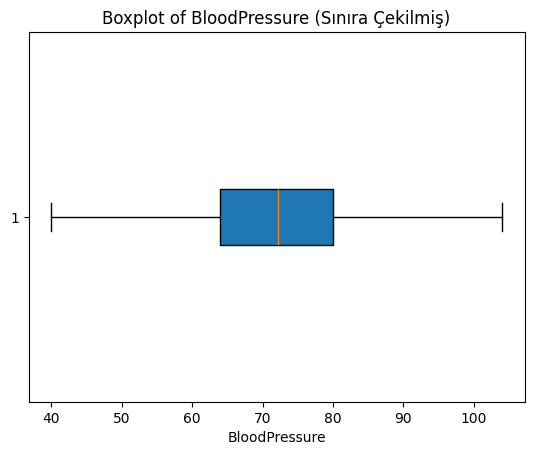


--- Insulin Sütunu ---


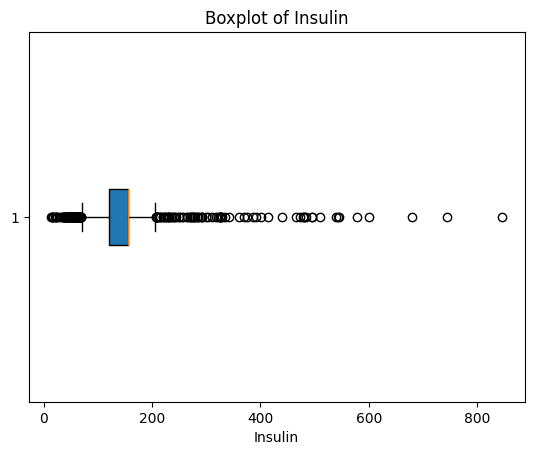

IQR: 34.04822335025381, Lower Bound: 70.42766497461929, Upper Bound: 206.62055837563452
Aykırı Değer Sayısı: 164


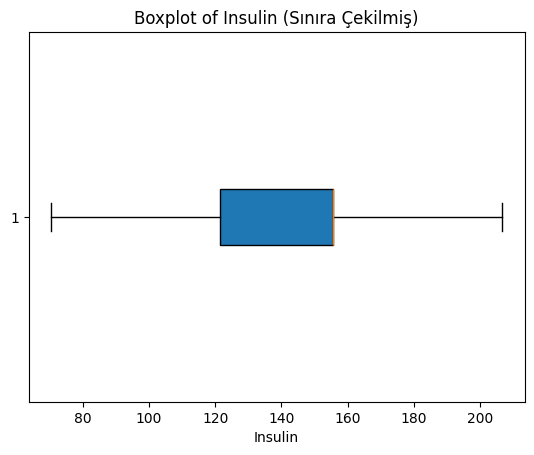


--- BMI Sütunu ---


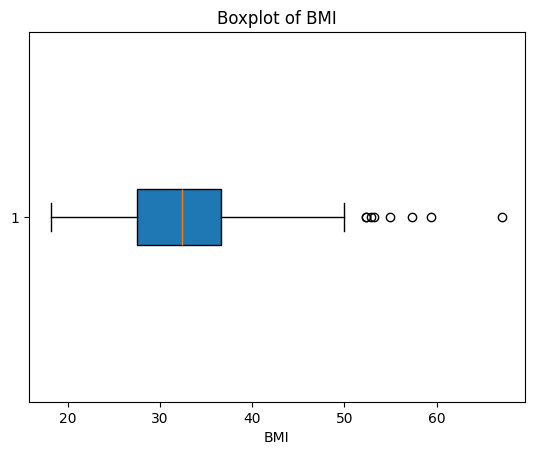

IQR: 9.100000000000001, Lower Bound: 13.849999999999998, Upper Bound: 50.25
Aykırı Değer Sayısı: 8


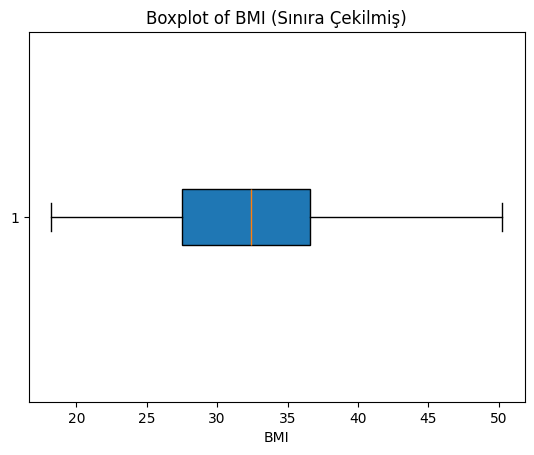


--- DiabetesPedigreeFunction Sütunu ---


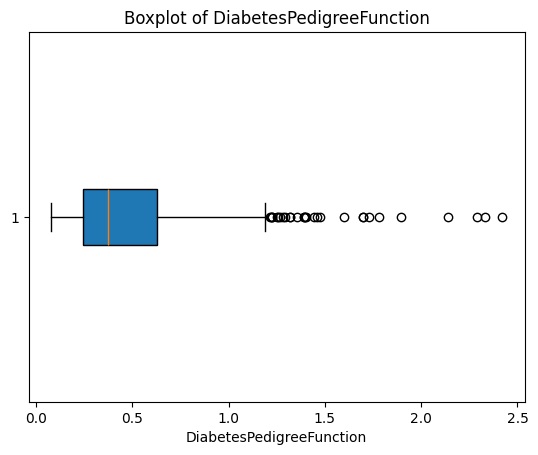

IQR: 0.38249999999999995, Lower Bound: -0.32999999999999996, Upper Bound: 1.2
Aykırı Değer Sayısı: 29


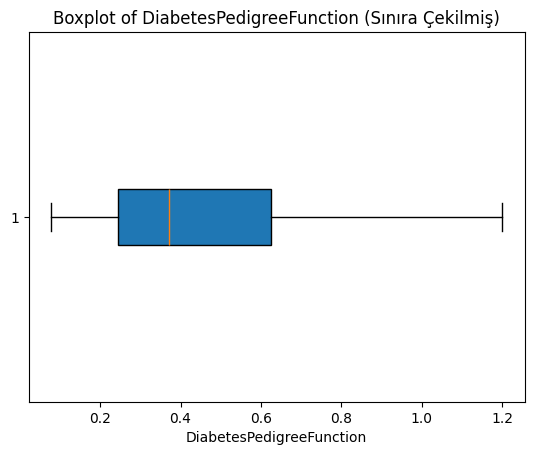


--- Age Sütunu ---


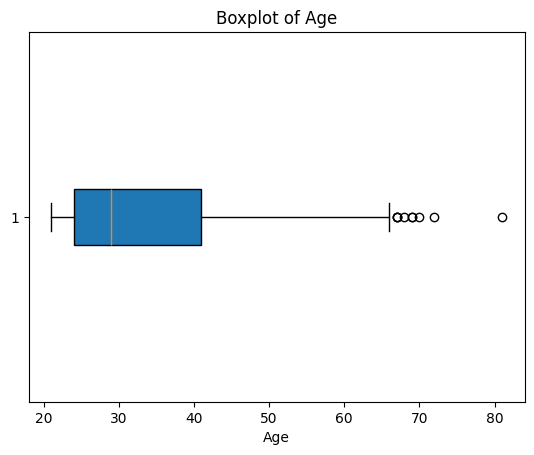

IQR: 17.0, Lower Bound: -1.5, Upper Bound: 66.5
Aykırı Değer Sayısı: 9


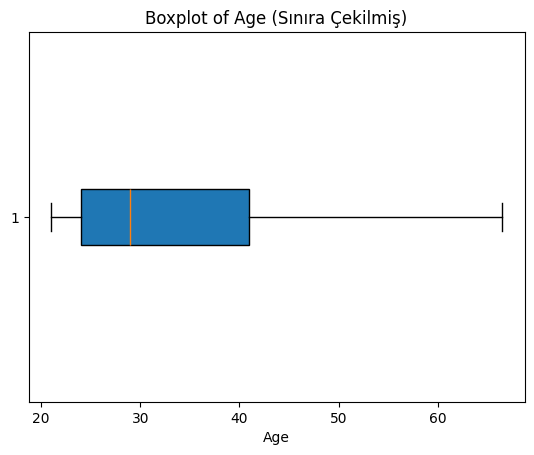


--- Outcome Sütunu ---


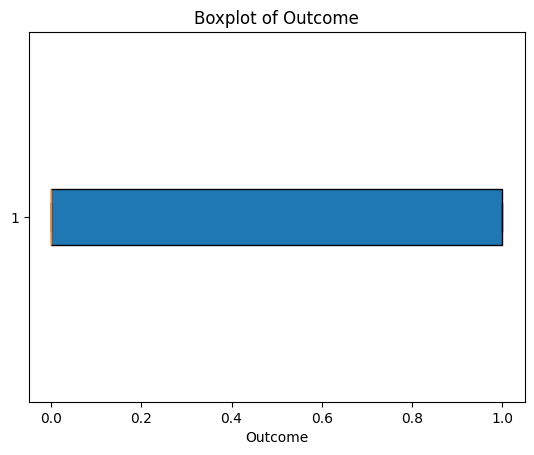

IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Aykırı Değer Sayısı: 0


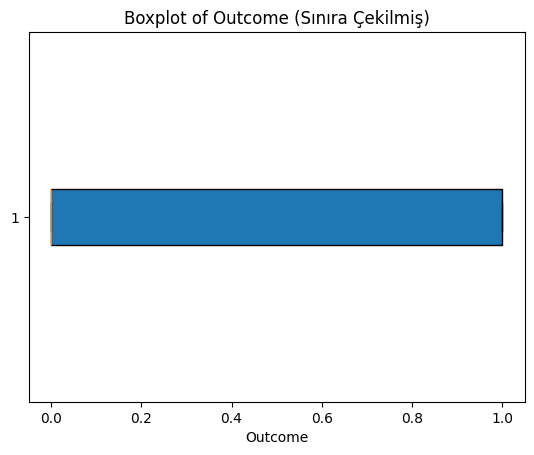


--- Pregnancy_Age_Ratio Sütunu ---


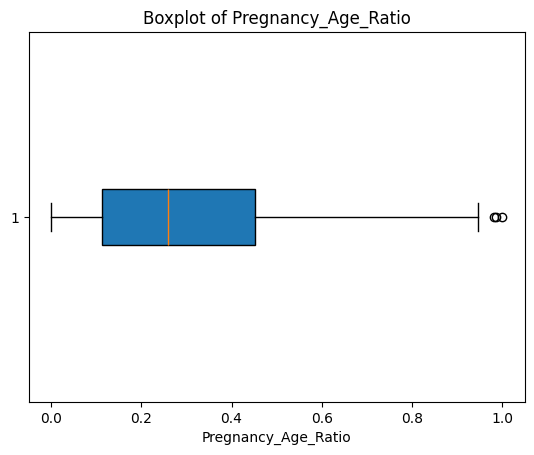

IQR: 0.3392857142857143, Lower Bound: -0.3958333333333333, Upper Bound: 0.9613095238095237
Aykırı Değer Sayısı: 3


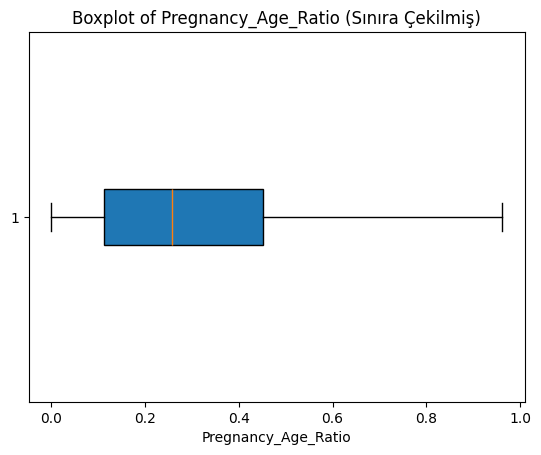


--- Health_Risk_Score Sütunu ---


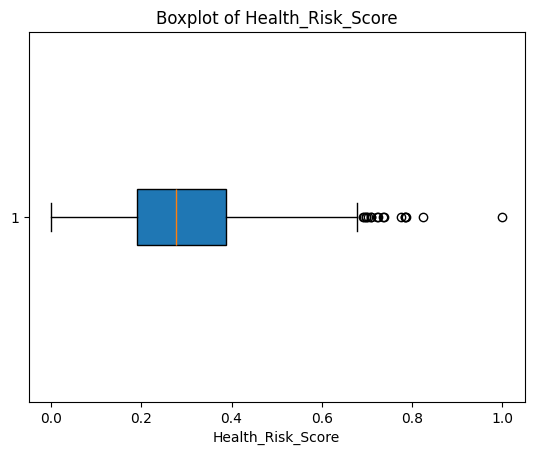

IQR: 0.19638500834028352, Lower Bound: -0.1039160237698081, Upper Bound: 0.681624009591326
Aykırı Değer Sayısı: 17


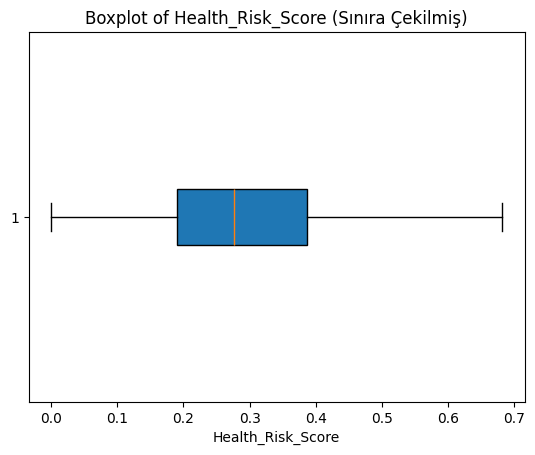

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    print(f"\n--- {col} Sütunu ---")

    # Boxplot ile aykırı değerleri görselleştir
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # IQR yöntemi ile aykırı değer analizi
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Aykırı Değer Sayısı: {len(outliers)}")

    # Aykırı değerleri sınıra çek
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Sınıra çekilmiş veriyi tekrar görselleştir
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Sınıra Çekilmiş)")
    plt.xlabel(col)
    plt.show()



Aykırı değerleri sınıra çektikten sonra hepsini z-score ile standartlaştırmaya karar verdim

In [39]:
from scipy.stats import zscore
df[col] = zscore(df[col])

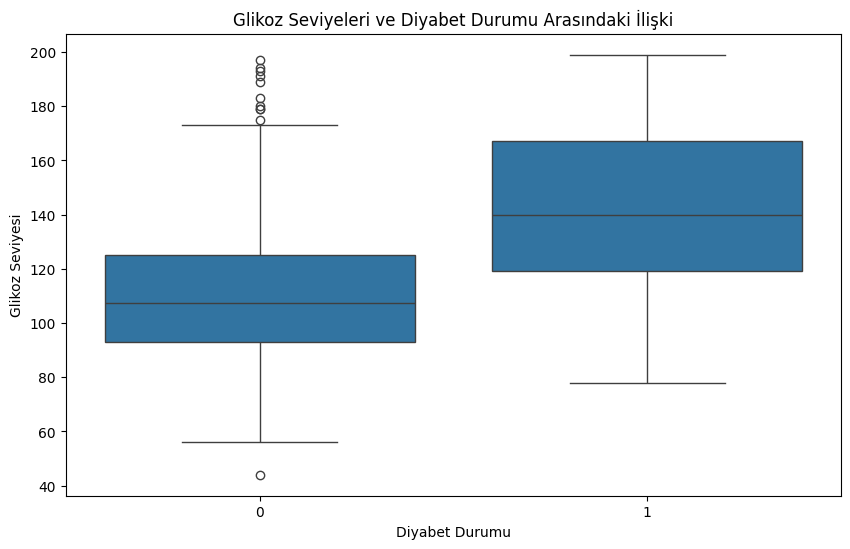

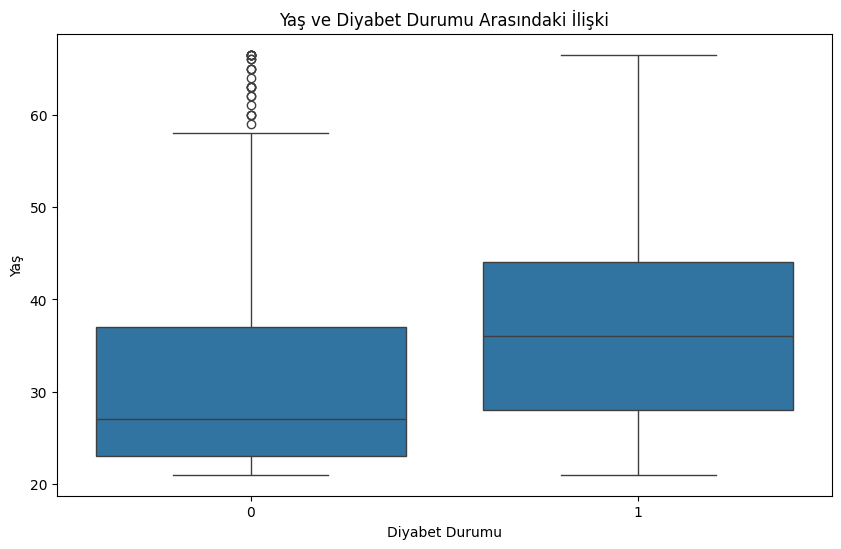

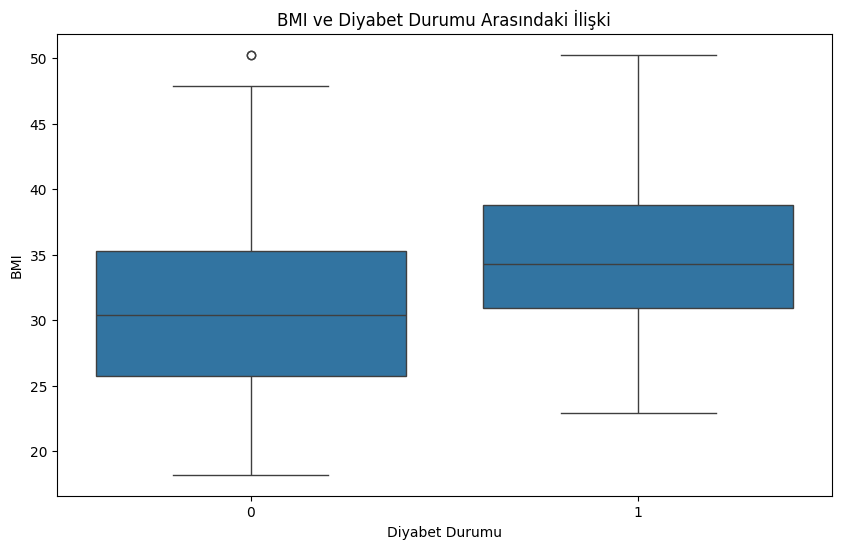

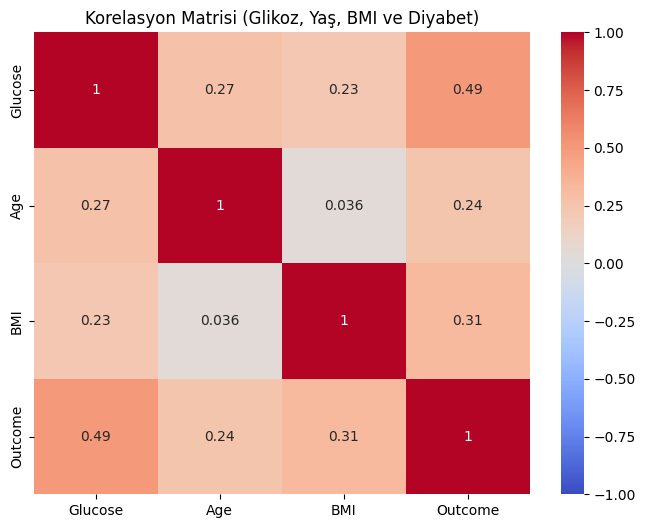

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diyabet (Outcome) hedef değişkeni ve diğer özelliklerin görselleştirilmesi

# Glikoz seviyeleri ve diyabet arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glikoz Seviyeleri ve Diyabet Durumu Arasındaki İlişki')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Glikoz Seviyesi')
plt.show()

# Yaş ve diyabet arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Yaş ve Diyabet Durumu Arasındaki İlişki')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Yaş')
plt.show()

# BMI ve diyabet arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI ve Diyabet Durumu Arasındaki İlişki')
plt.xlabel('Diyabet Durumu')
plt.ylabel('BMI')
plt.show()

# Glikoz seviyeleri, yaş ve BMI'nin hedef değişkenle olan korelasyonunu inceleyelim
corr = df[['Glucose', 'Age', 'BMI', 'Outcome']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi (Glikoz, Yaş, BMI ve Diyabet)')
plt.show()



- Glikoz ve Diyabet arasında 0.49'luk bir pozitif korelasyon var, yani glikoz seviyeleri arttıkça diyabet olasılığı da artıyor.
- Yaş ve Diyabet arasında 0.24'lük bir pozitif korelasyon var, bu da yaş arttıkça diyabet olasılığının biraz arttığını gösterir.
- BMI ve Diyabet arasında 0.31'lik bir pozitif korelasyon var, yani BMI arttıkça diyabet olasılığı da artıyor.
- Glikoz ve Yaş arasında 0.27'lik bir pozitif korelasyon var, yani yaş arttıkça glikoz seviyeleri de biraz artıyor.
- Glikoz ve BMI arasında 0.23'lük bir pozitif korelasyon var, yani glikoz seviyeleri arttıkça BMI'nin de biraz arttığını gösterir.
- Yaş ve BMI arasında 0.036'lık çok zayıf bir pozitif korelasyon var, yani yaş ve BMI arasında neredeyse hiçbir ilişki yok.

In [44]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,Pregnancy_Age_Ratio,Health_Risk_Score
0,6.0,148.0,72.0,155.548223,33.6,0.627,50.0,1,Yaşlı,0.325714,0.695142
1,1.0,85.0,66.0,155.548223,26.6,0.351,31.0,0,Orta Yaşlı,0.087558,-1.209400
2,8.0,183.0,64.0,155.548223,23.3,0.672,32.0,1,Orta Yaşlı,0.678571,0.197270
3,1.0,89.0,66.0,94.000000,28.1,0.167,21.0,0,Genç,0.129252,-1.040914
4,0.0,137.0,40.0,168.000000,43.1,1.200,33.0,1,Orta Yaşlı,0.000000,1.349631


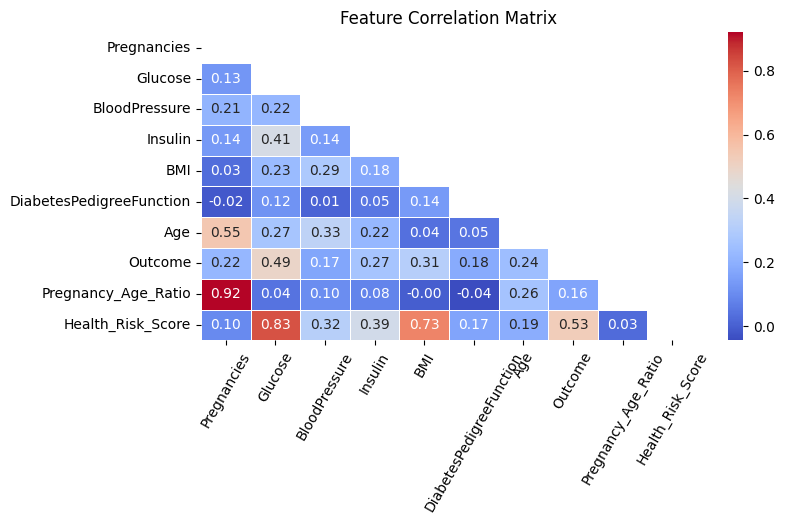

In [47]:
import numpy as np

# Feature correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=np.triu(correlation_matrix))

plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.title("Feature Correlation Matrix")
plt.show()

Pregnancies ve Pregnancy_Age_Ratio arasında çok yüksek negatif bir korelasyon var (-0.92). Bu, bu iki özelliğin çok benzer bilgi taşıdığını gösteriyor. Bunlardan birini çıkarabilirsiniz.
Glucose ve Health_Risk_Score arasında yüksek bir pozitif korelasyon var (0.83). Health_Risk_Score büyük olasılıkla diğer değişkenlerden türetilmiş bir özellik (örneğin, Glucose ve BMI). Eğer bu türetilmiş özellik, diğer özelliklerin birleşiminden hesaplanıyorsa, Health_Risk_Score çıkarılabilir.Pregnancy_Age_Ratio'yı çıkartıyorum

In [48]:
df.drop(columns=['Pregnancy_Age_Ratio'], inplace=True)

Age_Category kategorik değişkenini modelin anlaması ve işleyebilmesi için sayısal değişkene dönüştürüyorum, sıralı olmadığı için one-hot encoding kullanıyorum.

In [55]:
# One-hot encoding
df = pd.get_dummies(df, columns=["Age_Category"])

In [56]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Health_Risk_Score,Age_Category_Genç,Age_Category_Orta Yaşlı,Age_Category_Yaşlı
0,6.0,148.0,72.0,155.548223,33.6,0.627,50.0,1,0.695142,False,False,True
1,1.0,85.0,66.0,155.548223,26.6,0.351,31.0,0,-1.209400,False,True,False
2,8.0,183.0,64.0,155.548223,23.3,0.672,32.0,1,0.197270,False,True,False
3,1.0,89.0,66.0,94.000000,28.1,0.167,21.0,0,-1.040914,True,False,False
4,0.0,137.0,40.0,168.000000,43.1,1.200,33.0,1,1.349631,False,True,False


In [63]:
# Veri Seti Hazırlığı
Y=df['Outcome']
X=df.drop('Outcome',axis=1)

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0,stratify=df['Outcome'])

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,Y_train)
from sklearn.metrics import accuracy_score

# Performans Değerlendirme
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(Y_test, y_predict)
print("Accuracy: ", round(accuracy, 2) * 100, '%')

# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, y_predict))


Accuracy:  81.0 %

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       100
           1       0.77      0.63      0.69        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# Veri Seti Hazırlığı
Y = df['Outcome']
X = df.drop('Outcome', axis=1)

# Eğitim ve test verilerine ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0, stratify=df['Outcome'])

# Random Forest Modelini oluşturma ve eğitim
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Tahminler
y_predict_rf = rf_model.predict(X_test)

# Performans Değerlendirme
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy_rf = accuracy_score(Y_test, y_predict_rf)
print("Random Forest Accuracy: ", round(accuracy_rf, 2) * 100, '%')

# Classification Report
print("\nRandom Forest Classification Report:\n", classification_report(Y_test, y_predict_rf))


Random Forest Accuracy:  78.0 %

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154

